In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("churn_dataset.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Removing the null values from the total charges

In [4]:
df1=df.copy()
df1['TotalCharges'] =pd.to_numeric(df1['TotalCharges'],errors='coerce')
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df1.loc[df1.TotalCharges.isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Droping the null values using the drop na function

In [7]:
df1.dropna(how='any',inplace=True)

In [8]:
df1.select_dtypes(include='number').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [9]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Finding the outliers using the box plot

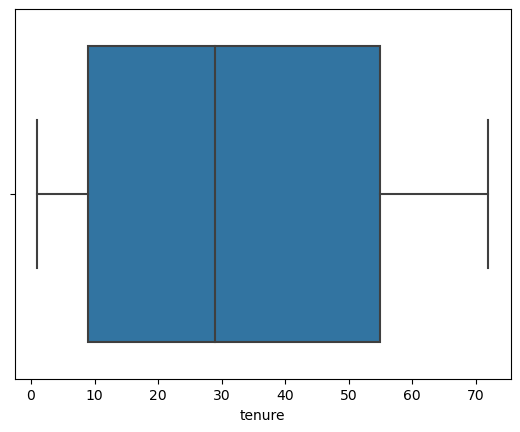

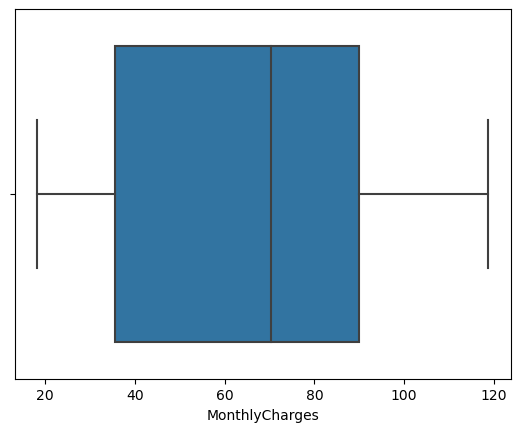

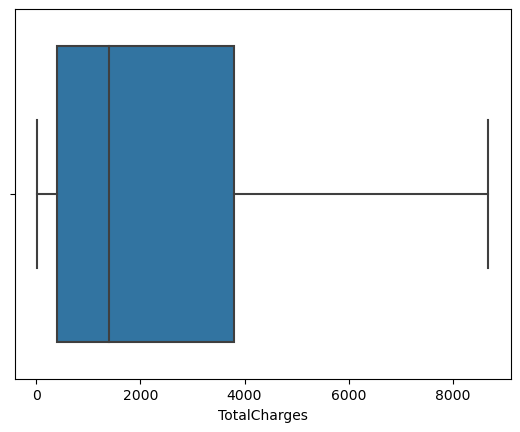

In [10]:
num=['tenure', 'MonthlyCharges', 'TotalCharges']
for i in num:
    sns.boxplot(data=df1,x=i)
    plt.show()
    

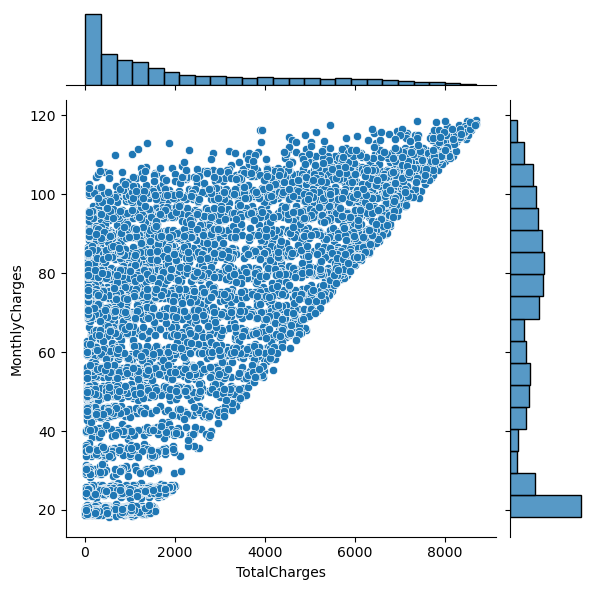

In [11]:
sns.jointplot(x = df1['TotalCharges'], y= df1['MonthlyCharges'])

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

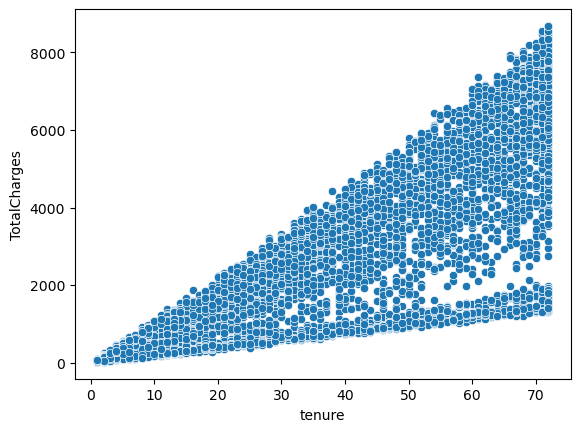

In [12]:
sns.scatterplot(x='tenure',y='TotalCharges',data=df1)

The above scatter plots tell that  as the Total charges is increasing as tenure increases

In the above plot the mode of payment of bank transfer is more compare to other transfer

In [13]:
df2=df1.head()

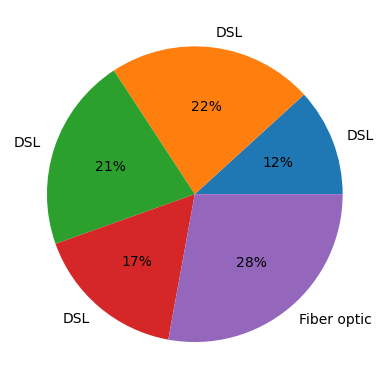

In [14]:
plt.pie(df2['MonthlyCharges'], labels = df2['InternetService'], autopct='%.0f%%')
plt.show()

In the above chart the internet service of DSL is more compare to fiber optic

<AxesSubplot:ylabel='Count'>

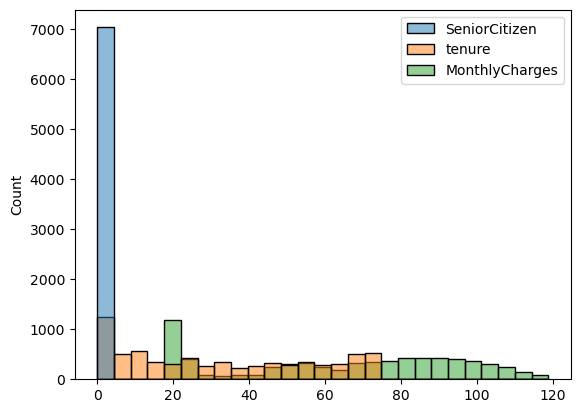

In [15]:
sns.histplot(df)

# splitiing the data into input and output

In [16]:
X=df1[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y=df1['Churn']

# spliting the data into training and testing

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_train_cat=X_train.select_dtypes(include=['object'])
X_test_cat=X_test.select_dtypes(include=['object'])

# Converting the numerical data to Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_std=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_test_num_std=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

# Converting the Categorical data to One Hot Encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat),columns=encoder.get_feature_names_out(X_train_cat.columns),index=X_train_cat.index)
X_test_cat_ohe=pd.DataFrame(encoder.transform(X_test_cat),columns=encoder.get_feature_names_out(X_test_cat.columns),index=X_test_cat.index)

C:\Users\sarva\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# concating the xtrain num to xtrain cat

In [20]:
X_train_concat=pd.concat([X_train_num_std,X_train_cat_ohe],axis=1)
X_test_concat=pd.concat([X_test_num_std,X_test_cat_ohe],axis=1)

Mean accuracy score:  0.8122866894197952
confusion metrics:  [[1182  129]
 [ 201  246]]


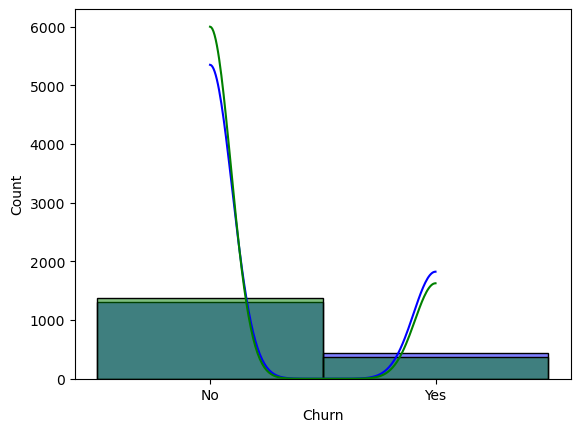

In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_concat,y_train) 
Algorithm=[]
Accuracy_score=[]
y_test_predict=classifier.predict(X_test_concat)
from sklearn import metrics
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_predict))
Algorithm.append('LogisticRegression')
sns.histplot(y_test, color = 'blue', kde = True)
sns.histplot(y_test_predict, color = 'green', kde = True);
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predict))
print('confusion metrics: ', metrics.confusion_matrix(y_test, y_test_predict))


Mean accuracy score:  0.7605233219567691
confusion metrics:  [[1112  199]
 [ 222  225]]


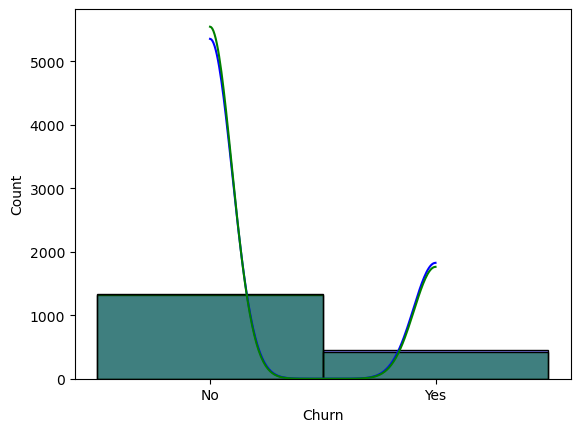

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train_concat,y_train)
y_test_predict=classifier.predict(X_test_concat)
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_predict))
Algorithm.append('KNeighborsClassifier')
sns.histplot(y_test, color = 'blue', kde = True)
sns.histplot(y_test_predict, color = 'green', kde = True);
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predict))
print('confusion metrics: ', metrics.confusion_matrix(y_test, y_test_predict))


Mean accuracy score:  0.8077360637087599
confusion metrics:  [[1208  103]
 [ 235  212]]


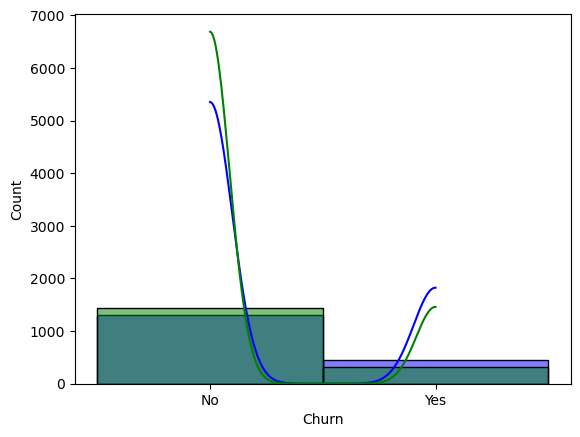

In [23]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train_concat,y_train)
y_test_predict=classifier.predict(X_test_concat)
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_predict))
Algorithm.append('SVC')
sns.histplot(y_test, color = 'blue', kde = True)
sns.histplot(y_test_predict, color = 'green', kde = True);
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predict))
print('confusion metrics: ', metrics.confusion_matrix(y_test, y_test_predict))


Mean accuracy score:  0.7246871444823664
confusion metrics:  [[1063  248]
 [ 236  211]]


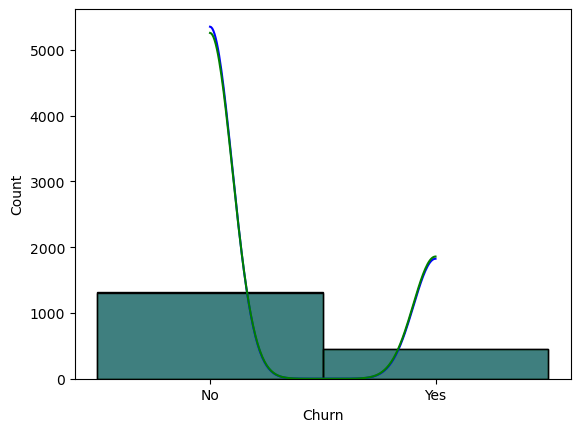

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_concat,y_train)
y_test_predict=classifier.predict(X_test_concat)
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_predict))
Algorithm.append('DecisionTreeClassifier')
sns.histplot(y_test, color = 'blue', kde = True)
sns.histplot(y_test_predict, color = 'green', kde = True);
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predict))
print('confusion metrics: ', metrics.confusion_matrix(y_test, y_test_predict))


Mean accuracy score:  0.6712172923777019
confusion metrics:  [[793 518]
 [ 60 387]]


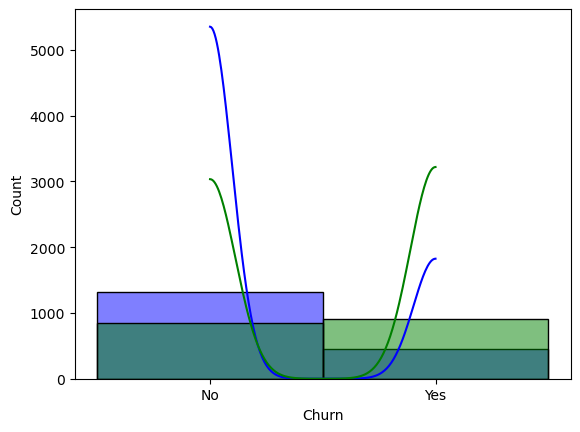

In [25]:
from sklearn.naive_bayes import  GaussianNB
classifier=GaussianNB()
classifier.fit(X_train_concat,y_train)
y_test_predict=classifier.predict(X_test_concat)
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_predict))
Algorithm.append('GaussianNB')
sns.histplot(y_test, color = 'blue', kde = True)
sns.histplot(y_test_predict, color = 'green', kde = True);
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predict))
print('confusion metrics: ', metrics.confusion_matrix(y_test, y_test_predict))


Mean accuracy score:  0.810580204778157
confusion metrics:  [[1189  122]
 [ 211  236]]


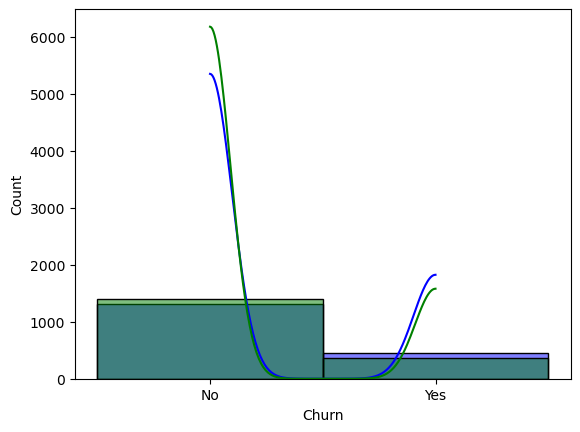

In [26]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier()
classifier.fit(X_train_concat,y_train)
y_test_predict=classifier.predict(X_test_concat)
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_predict))
Algorithm.append('AdaBoostClassifier')
sns.histplot(y_test, color = 'blue', kde = True)
sns.histplot(y_test_predict, color = 'green', kde = True);
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predict))
print('confusion metrics: ', metrics.confusion_matrix(y_test, y_test_predict))


In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_concat,y_train)
y_test_predict=classifier.predict(X_test_concat)
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_predict))
Algorithm.append('RandomForestClassifier')


In [28]:
overview=pd.DataFrame({"Accuracy_score":Accuracy_score},index=Algorithm)

In [29]:
overview

,Accuracy_score
LogisticRegression,0.812287
KNeighborsClassifier,0.760523
SVC,0.807736
DecisionTreeClassifier,0.724687
GaussianNB,0.671217
AdaBoostClassifier,0.810580
RandomForestClassifier,0.794653


# Conclusion:

# As Per the  Accuracy Score values, LogisticRegression is giving High Score to Solve Churn Prediction.